<a href="https://colab.research.google.com/github/onlygoodman/python/blob/good/5_%ED%8A%B8%EB%A6%AC%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

#df.info(), df.describe() 알아두기

data = wine.iloc[:, :3].to_numpy()
target = wine.iloc[:, -1].to_numpy()

In [ ]:
def ttsplit(x, y, size=0.25, n=42):
  from sklearn.model_selection import train_test_split
  train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=size, random_state=n)

  return train_input, test_input, train_target, test_target
ttsplit(data, target, 0.2)
print(train_input)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape)
print(test_input.shape)

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3)
(1300, 3)


In [ ]:
def f_score(x):

  tras=x.score(train_scaled, train_target)
  tess=x.score(test_scaled, test_target)

  print("train_scaled score \t: ", x.score(train_scaled, train_target))
  print("test_sacled score \t: ", x.score(test_scaled, test_target))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

f_score(lr)

train_scaled score 	:  0.7808350971714451
test_sacled score 	:  0.7776923076923077


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42)
dt.fit(train_scaled, train_target)

f_score(dt)

train_scaled score 	:  0.996921300750433
test_sacled score 	:  0.8592307692307692


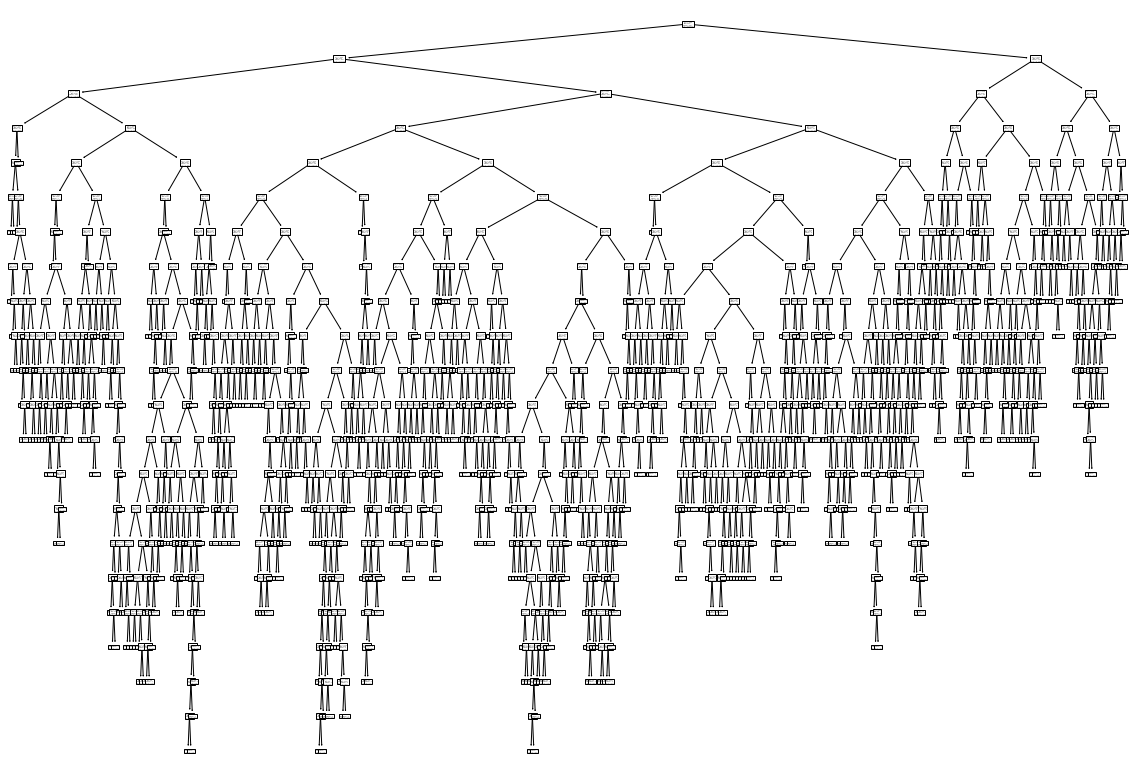

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,14))
plot_tree(dt)
plt.show()

노드가 뭔가요?
노드는 결정 트리를 구성하는 핵심요소입니다.
노드는 훈련 데이터의 특성에 대한 테스트를 표현합니다.

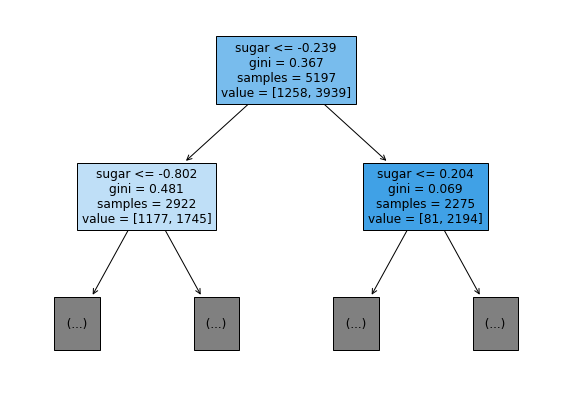

In [ ]:
plt.figure(figsize=(10, 7 ))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##중요 교차 검증과 그리드 서치

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#검증데이터 형성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [2]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
#fit_time, score_time, test_score 의 키를 가진 딕셔너리를 반환 각 키마다 5개의 숫자가 들어있다. 디폴트값은 5로 5-폴드 교차 검증수행을 했다.

import numpy as np
print(np.mean(scores['test_score']))


{'fit_time': array([0.01116633, 0.01445007, 0.01796961, 0.010818  , 0.01087809]), 'score_time': array([0.00124812, 0.00127101, 0.00136971, 0.00124121, 0.00125647]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487
